In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [68]:
df = pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [69]:
X=df.drop(['No','Y house price of unit area'], axis=1)
y=df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [70]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.7735999969964081

In [71]:
y_pred = knn.predict(X_test)
y_pred

array([49.86, 18.2 , 40.28, 18.2 , 36.36, 37.32, 40.66, 33.4 , 45.08,
       40.74, 59.72, 43.06, 47.36, 44.6 , 63.56, 35.56, 37.62, 48.48,
       39.76, 42.36, 56.92, 40.18, 30.42, 49.54, 42.96, 44.34, 40.5 ,
       26.56, 51.5 , 30.64, 49.98, 37.28, 48.08, 37.74, 40.5 , 40.18,
       53.42, 28.7 , 53.6 , 15.26, 45.76, 45.62, 26.34, 52.18, 16.58,
       53.2 , 37.76, 16.66, 26.72, 53.82, 59.38, 37.54, 49.7 , 24.76,
       40.18, 46.62, 52.1 , 37.22, 59.72, 37.28, 35.56, 53.42, 48.8 ,
       45.08, 40.9 , 26.38, 18.2 , 24.32, 52.1 , 37.32, 30.42, 51.5 ,
       40.9 , 24.52, 39.94, 28.42, 26.98, 18.2 , 49.88, 32.18, 49.88,
       40.18, 36.22, 25.58, 25.58, 39.94, 41.6 , 25.1 , 51.5 , 47.76,
       48.48, 41.56, 40.18, 30.42, 17.1 , 40.9 , 28.18, 40.74, 16.66,
       41.6 , 48.48, 39.76, 42.5 , 32.18, 47.36, 40.18, 42.5 , 15.26,
       42.84, 18.28, 41.32, 37.54, 26.84, 37.28, 48.8 , 26.76, 43.28,
       44.6 , 39.16, 26.38, 28.42, 40.14, 40.18, 32.18, 56.92])

In [72]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 84.60930560000003
R-squared: 0.5035370934122603


In [73]:
mse_values = []
for i in range(1, 16):
    knn_i = KNeighborsRegressor(n_neighbors=i)
    knn_i.fit(X_train, y_train)
    y_pred_i = knn_i.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred_i))

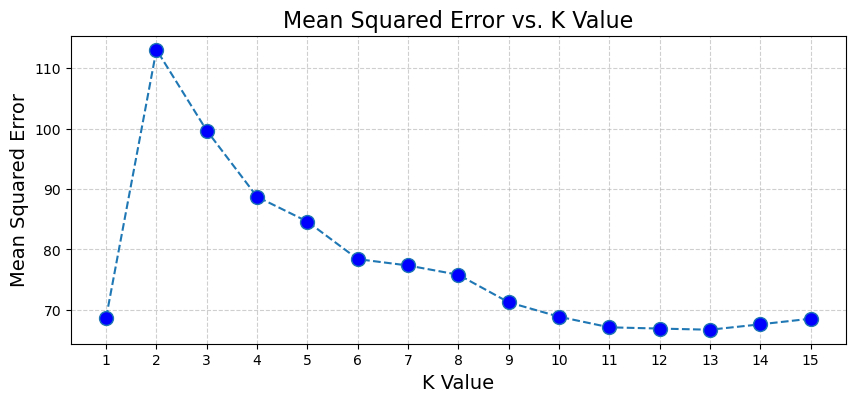

In [74]:
plt.figure(figsize=(10, 4))
plt.plot(range(1, 16), mse_values, marker='o', linestyle='dashed', markersize=10, markerfacecolor='blue')
plt.title('Mean Squared Error vs. K Value', fontsize=16)
plt.xlabel('K Value', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xticks(range(1, 16))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [75]:
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [76]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [77]:
correlation_matrix = df.corr().round(2)
correlation_matrix

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.00,-0.05,-0.03,-0.01,-0.01,-0.01,-0.01,-0.03
X1 transaction date,-0.05,1.00,0.02,0.06,0.01,0.04,-0.04,0.09
X2 house age,-0.03,0.02,1.00,0.03,0.05,0.05,-0.05,-0.21
X3 distance to the nearest MRT station,-0.01,0.06,0.03,1.00,-0.60,-0.59,-0.81,-0.67
X4 number of convenience stores,-0.01,0.01,0.05,-0.60,1.00,0.44,0.45,0.57
X5 latitude,-0.01,0.04,0.05,-0.59,0.44,1.00,0.41,0.55
X6 longitude,-0.01,-0.04,-0.05,-0.81,0.45,0.41,1.00,0.52
Y house price of unit area,-0.03,0.09,-0.21,-0.67,0.57,0.55,0.52,1.00


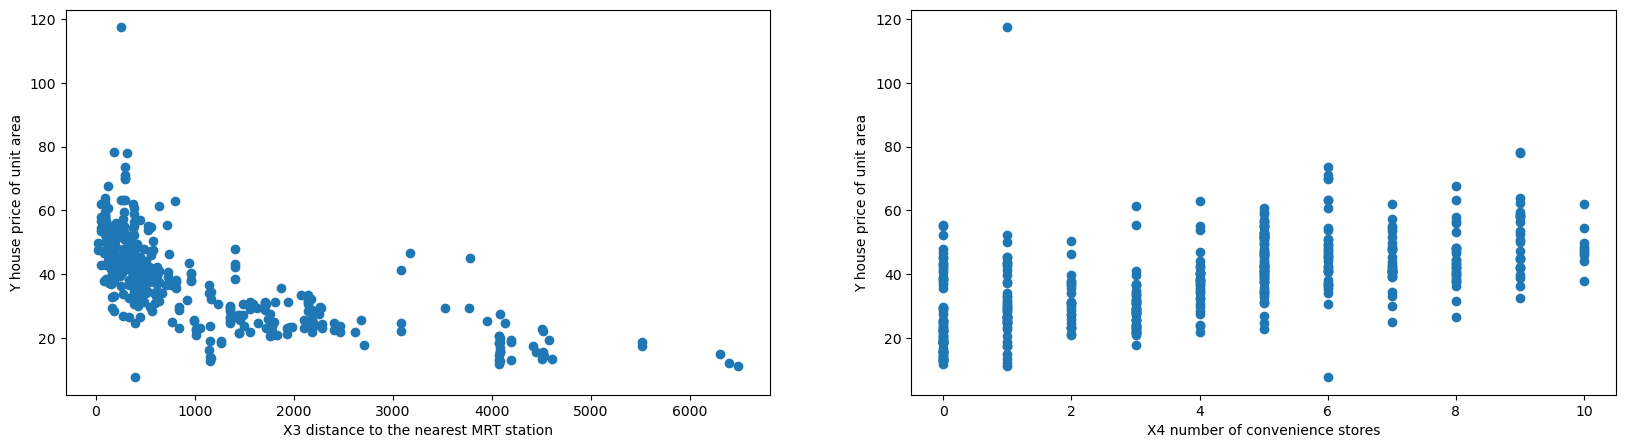

In [78]:
plt.figure(figsize=(20, 5))
feature = ['X3 distance to the nearest MRT station', 'X4 number of convenience stores']
for i, col in enumerate(feature):
    plt.subplot(1, len(feature), i + 1)
    x = df[col]
    y = df['Y house price of unit area']
    plt.scatter(x, y, marker='o')
    plt.xlabel(col)
    plt.ylabel('Y house price of unit area')
plt.show()

In [79]:
X = pd.DataFrame(np.c_[df['X3 distance to the nearest MRT station'], df['X4 number of convenience stores']], columns=['X3', 'X4'])
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 2), (83, 2), (331,), (83,))

In [80]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [81]:
y_train_pred = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2 = r2_score(y_train, y_train_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 10.078452309925485
R2: 0.48030157682457464


In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [83]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [84]:
X=df.drop('Y house price of unit area', axis=1)
y=df['Y house price of unit area']

In [85]:
polynomial_converter=PolynomialFeatures(degree=2, include_bias=False)
poly_features=polynomial_converter.fit(X)
poly_features=polynomial_converter.transform(X)
poly_features.shape

(414, 35)

In [86]:
X_train, X_test, y_train, y_test = train_test_split( poly_features, y, test_size=0.3, random_state=101)
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

In [87]:
y_pred=polymodel.predict(X_test)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
176,19.2,16.682017,2.517983
347,11.2,5.056015,6.143985
307,24.7,20.453709,4.246291
299,46.1,47.809955,-1.709955
391,31.3,28.199352,3.100648


In [88]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)
pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly], index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,4.465780
MSE,31.568296
RMSE,5.618567


In [89]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

In [90]:
MAE_simple = metrics.mean_absolute_error(y_test,ys_pred)
MSE_simple = metrics.mean_squared_error(y_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly],
'Simple Metrics':[MAE_simple, MSE_simple,RMSE_simple]},
index=['MAE', 'MSE', 'RMSE'])


,Poly Metrics,Simple Metrics
MAE,4.465780,5.373025
MSE,31.568296,45.880307
RMSE,5.618567,6.773500


In [91]:
train_RMSE_list=[] # Train List of RMSE per degree
test_RMSE_list=[] #Test List of RMSE per degree
for d in range(1,10):
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)
    train_RMSE=np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
    test_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [92]:
pd.DataFrame({'Train RMSE List':train_RMSE_list, 'Test RMSE List':test_RMSE_list} )

,Train RMSE List,Test RMSE List
0,9.537107,6.773500
1,8.051956,5.618567
2,7.256683,9.259450
3,6.164940,70.291571
4,5.278492,128.746982
5,5.352144,515.811964
6,5.478648,13183.112243
7,5.863090,14129.942046
8,6.359515,15105.823052


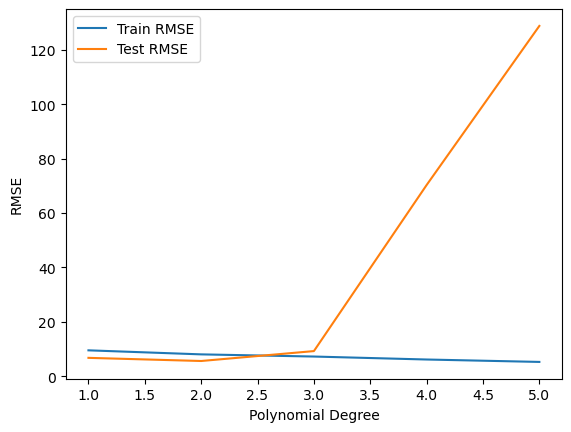

In [93]:
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()